Data Analytics Track - Stage 1 Task: Feature Engineering & Exploration.

In [3]:
# Step 1: Data Preparation

In [10]:
import pandas as pd

In [11]:
# Load each dataset (since they are in the same folder, no path needed)
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

In [12]:
# View first few rows of each
print("Movies:")
display(movies.head())

Movies:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
print("\nRatings:")
display(ratings.head())


Ratings:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
print("\nTags:")
display(tags.head())


Tags:


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [9]:
print("\nLinks:")
display(links.head())


Links:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [10]:
# Step 2: Feature Engineering
# Merge ratings with movies
merged_df = pd.merge(ratings, movies, on='movieId', how='left')

In [11]:
# Merge with tags
merged_df = pd.merge(merged_df, tags, on=['movieId', 'userId'], how='left')
# Merge with links (optional)
merged_df = pd.merge(merged_df, links, on='movieId', how='left')
# Display a few rows of the final dataset
merged_df.head()

,userId,movieId,rating,timestamp_x,title,genres,tag,timestamp_y,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,114709,862.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,113228,15602.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,NaN,NaN,113277,949.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN,NaN,114369,807.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN,NaN,114814,629.0


In [12]:
# STEP 5: DATA CLEANING
# Check for missing values
print("Missing values per column:\n", merged_df.isnull().sum())
# Drop duplicates if any
merged_df.drop_duplicates(inplace=True)
# Convert timestamp columns to datetime format
merged_df['timestamp_x'] = pd.to_datetime(merged_df['timestamp_x'], unit='s', errors='coerce')
merged_df['timestamp_y'] = pd.to_datetime(merged_df['timestamp_y'], unit='s', errors='coerce')
# Rename for clarity
merged_df.rename(columns={'timestamp_x': 'rating_timestamp', 'timestamp_y': 'tag_timestamp'}, inplace=True)
print("\n✅ Data cleaned and timestamps converted successfully.")
merged_df.head()

Missing values per column:
 userId             0
movieId            0
rating             0
timestamp_x        0
title              0
genres             0
tag            99201
timestamp_y    99201
imdbId             0
tmdbId            13
dtype: int64

✅ Data cleaned and timestamps converted successfully.


,userId,movieId,rating,rating_timestamp,title,genres,tag,tag_timestamp,imdbId,tmdbId
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaT,114709,862.0
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,NaN,NaT,113228,15602.0
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,NaN,NaT,113277,949.0
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN,NaT,114369,807.0
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN,NaT,114814,629.0


In [13]:
# STEP 6: FEATURE ENGINEERING

In [14]:
import numpy as np

In [15]:
# 1⃣  Extract release year from the movie title
merged_df['release_year'] = merged_df['title'].str.extract(r'\((\d{4})\)').astype(float)

In [18]:
# 2⃣  Count number of genres per movie
merged_df['genre_count'] = merged_df['genres'].apply(lambda x: len(x.split('|')) if isinstance(x, str) else 0)

In [19]:
# 3⃣Calculate how old the movie is (as of 2025)
merged_df['movie_age'] = 2025 - merged_df['release_year']

In [20]:
# 4⃣Average rating per movie
movie_avg_rating = merged_df.groupby('movieId')['rating'].mean().reset_index(name='avg_rating')
merged_df = merged_df.merge(movie_avg_rating, on='movieId', how='left')

In [21]:
# 5⃣Number of ratings per movie
movie_rating_count = merged_df.groupby('movieId')['rating'].count().reset_index(name='rating_count')
merged_df = merged_df.merge(movie_rating_count, on='movieId', how='left')

In [22]:
# 6⃣Rating hour (to see what time of day people tend to rate)
merged_df['rating_hour'] = merged_df['rating_timestamp'].dt.hour

In [24]:
# 7⃣Weekday rating (0 = Monday)
merged_df['rating_weekday'] = merged_df['rating_timestamp'].dt.day_name()

In [28]:
print("✅ Feature engineering complete! Here are the new columns:\n")
print(merged_df[['title', 'release_year', 'genre_count', 'movie_age', 'avg_rating', 'rating_count', 'rating_hour']])

✅ Feature engineering complete! Here are the new columns:

                                 title  release_year  genre_count  movie_age  \
0                     Toy Story (1995)        1995.0            5       30.0   
1              Grumpier Old Men (1995)        1995.0            2       30.0   
2                          Heat (1995)        1995.0            3       30.0   
3          Seven (a.k.a. Se7en) (1995)        1995.0            2       30.0   
4           Usual Suspects, The (1995)        1995.0            3       30.0   
...                                ...           ...          ...        ...   
102672                    Split (2017)        2017.0            3        8.0   
102673   John Wick: Chapter Two (2017)        2017.0            3        8.0   
102674                  Get Out (2017)        2017.0            1        8.0   
102675                    Logan (2017)        2017.0            2        8.0   
102676  The Fate of the Furious (2017)        2017.0         

In [29]:
# STEP 7: EXPLORATORY DATA ANALYSIS (EDA)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

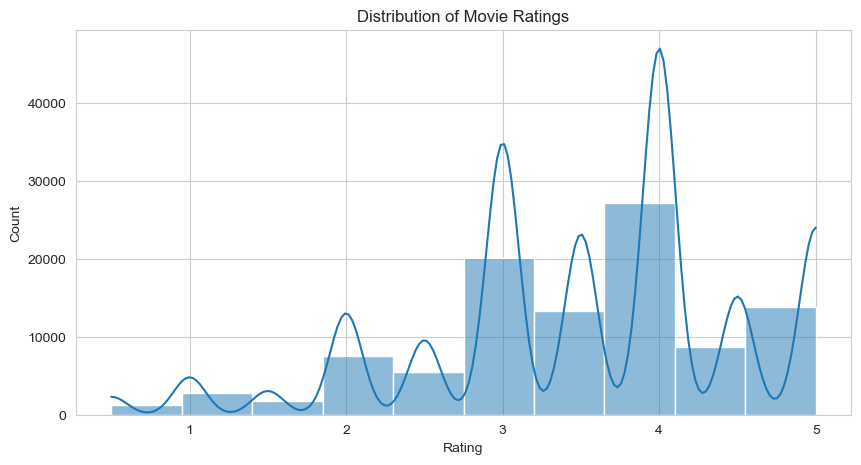

In [32]:
# 1⃣  Distribution of Ratings
sns.histplot(merged_df['rating'], bins=10, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

C:\Users\MR. ROWLINGS\AppData\Local\Temp\ipykernel_7996\3726818738.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies.values, y=top_movies.index, palette='coolwarm')


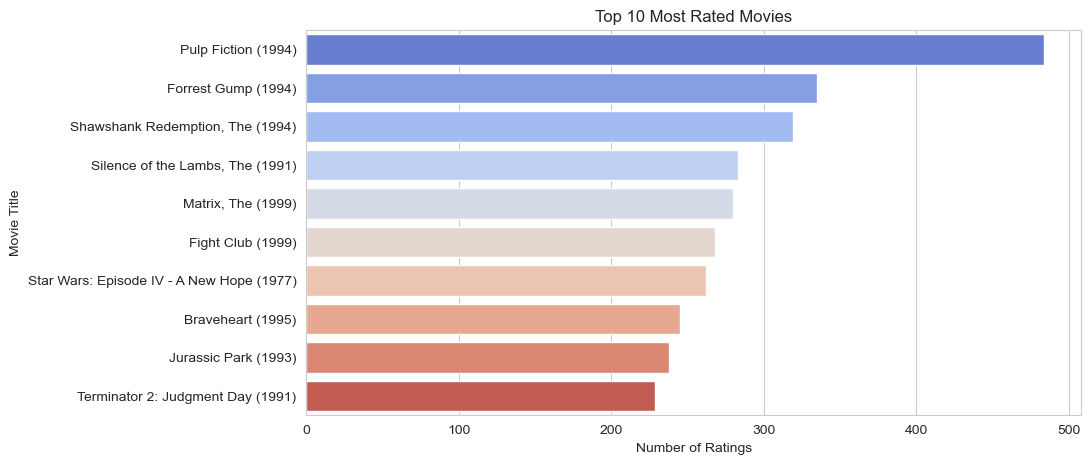

In [33]:
# 2⃣  Top 10 Movies by Number of Ratings
top_movies = merged_df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
sns.barplot(x=top_movies.values, y=top_movies.index, palette='coolwarm')
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.show()

C:\Users\MR. ROWLINGS\AppData\Local\Temp\ipykernel_7996\3992641893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg.values, y=genre_avg.index, palette='mako')


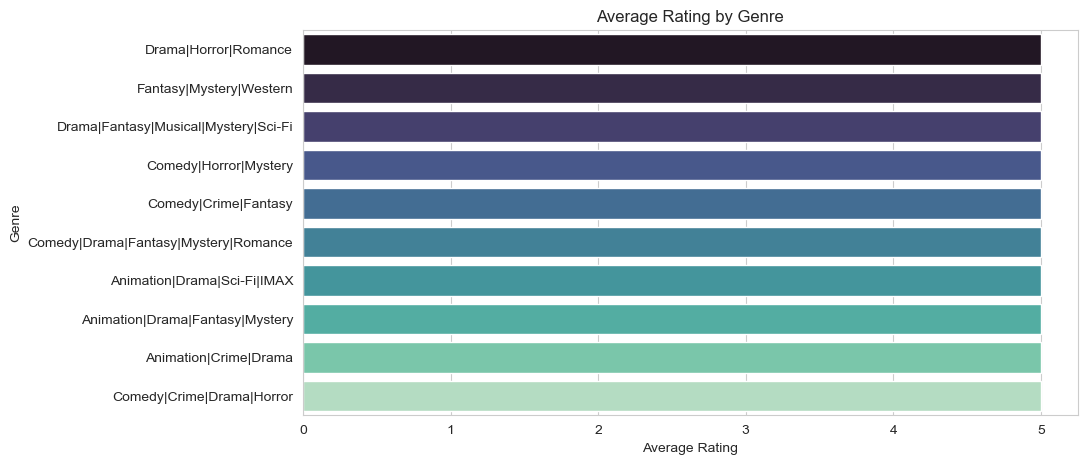

In [34]:
# 3⃣Average Rating per Genre
genre_avg = merged_df.groupby('genres')['rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=genre_avg.values, y=genre_avg.index, palette='mako')
plt.title("Average Rating by Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()

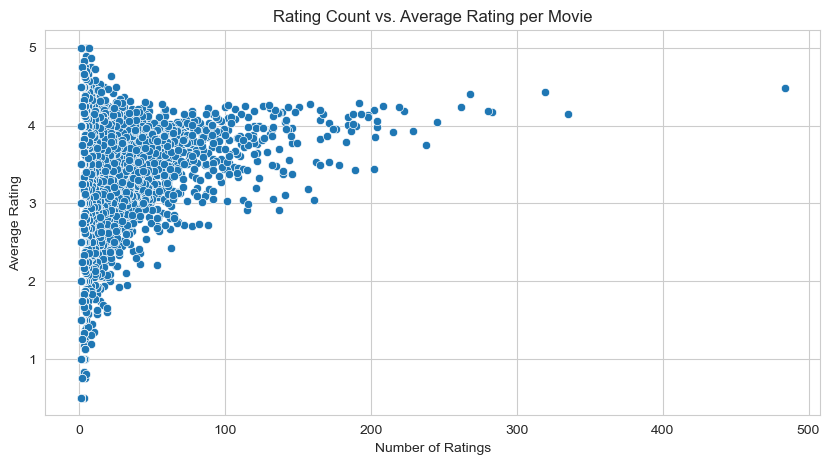

In [36]:
# 4⃣  Relationship between Number of Ratings and Average Rating
sns.scatterplot(data=merged_df.drop_duplicates('movieId'),
x='rating_count', y='avg_rating')
plt.title("Rating Count vs. Average Rating per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.show()

C:\Users\MR. ROWLINGS\AppData\Local\Temp\ipykernel_7996\447396862.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tags.values, y=top_tags.index, palette='viridis')


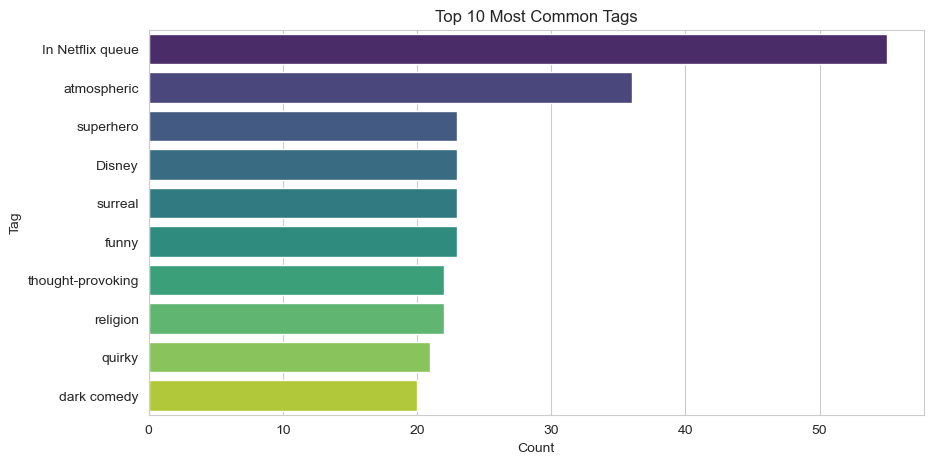

In [38]:
# 5⃣  Most Common Tags
top_tags = merged_df['tag'].value_counts().head(10)
sns.barplot(x=top_tags.values, y=top_tags.index, palette='viridis')
plt.title("Top 10 Most Common Tags")
plt.xlabel("Count")
plt.ylabel("Tag")
plt.show()

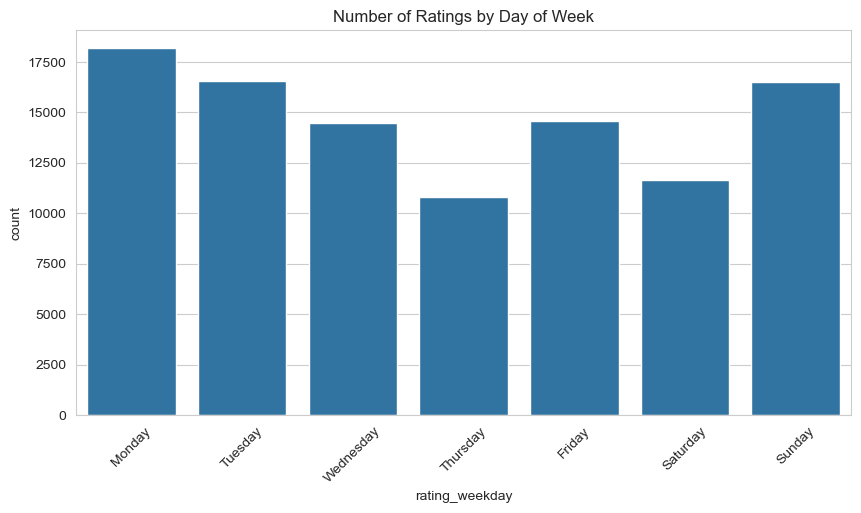

In [39]:
# 6⃣  Ratings by Day of the Week
sns.countplot(x='rating_weekday', data=merged_df,
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Number of Ratings by Day of Week")
plt.xticks(rotation=45)
plt.show()

Key Insights
1. Ratings Distribution: Most users give ratings between 3.0 and 4.5, showing a positive bias.
2. Most Rated Movies: A few popular titles dominate the ratings count.
3. Genres: Certain genres like Drama and Action tend to have higher average ratings.
4. Tags: User tags show engagement trends (e.g., “classic”, “funny”, “sci-fi” appear often).
5. Activity Pattern: Ratings peak around weekends.
6. Correlation: Movies with more ratings often have slightly lower average ratings — a popularity trade-off.
These insights help in designing a recommendation system by identifying popular genres, user preferences, and engagement patterns.

In [40]:
merged_df.to_csv("cleaned_movielens.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_movielens.csv'")

✅ Cleaned dataset saved as 'cleaned_movielens.csv'
